# Session 17 Project 4

## Analyzing stock dataset

#### This is a regression problem as target variable (stock price) is a continuous variable.

In [3]:
#Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

%matplotlib inline

In [4]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read stock dataset
# Download dataset from "https://drive.google.com/uc?id=1pP0Rr83ri0voscgr95-YnVCBv6BYV22w&export=download" and 
# place in the current folder
stock_data = pd.read_csv("data_stocks.csv")

In [6]:
# view header of dataframe
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [7]:
# view shape of data frame
stock_data.shape
print("shape of the DataFrame is : {}".format(stock_data.shape))
print("Rows : {0} \nColumns : {1}".format(stock_data.shape[0],stock_data.shape[1]))

shape of the DataFrame is : (41266, 502)
Rows : 41266 
Columns : 502


In [8]:
# Check all the DataTypes present in the stock dataset
stock_data.dtypes[0:5]

DATE             int64
SP500          float64
NASDAQ.AAL     float64
NASDAQ.AAPL    float64
NASDAQ.ADBE    float64
dtype: object

In [9]:
# check type of data in the stock dataset
stock_data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [10]:
# check columns of the stock_data
stock_data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [11]:
# view summary of stock_data dataframe
stock_data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [12]:
# As we observed from the stock_data header,
# Date is in UNIX format which need to converted to make this dataset in readable format
stock_data['DATE'] = pd.to_datetime(stock_data['DATE'],unit='s')

In [13]:
# Check the header after changing the Date format
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [14]:
# As observed from the above header,
# All the stocks are having multiple entries for each day So there is need to convert stock dataset which will be having
# Open, Closse, High and Low price for any perticular day

In [15]:
# Create a copy of stock_data DataFrame
stock_data_copy = stock_data.copy()

In [16]:
# Create DF_list -> Dictionary which contains all the stocks data items with the values as Open, Close, High, Low
# Create DF_list1 -> Dictionary which contains all the stocks data items with the Closing values
DF_list = {}
DF_list1 = {}
df2 = pd.DataFrame()
for column in stock_data_copy.columns[1:]:
    try :
        df_col = column.split('.')[1]
        #print(df_col)
    except :
        df_col = column        
        
    Open = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].first()
    Low = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].min()
    High = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].max()
    Close = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].last()
        
    df = pd.DataFrame([Open,Close,Low,High])
    #df1 = pd.concat([df1,Close])
    df1 = pd.DataFrame([Close])
    
    df = df.transpose()
    df1 = df1.transpose()
    
    df.columns = ['Open','Low','High','Close']
    df1.columns = [df_col]
    
    DF_list[df_col] = df
    DF_list1[df_col] = df1
    #df2.join(df1)
    #print(df.head())

In [17]:
# Create a DataFrame df5 (Merge all the stock data present in the dictionary DF_list1)
df5 = DF_list1['AAL'].reset_index()
for item in DF_list1.keys():
    df5 = pd.merge(df5,DF_list1[item].reset_index())
df5.index = df5['DATE']
df5 = df5.drop('DATE', axis=1)

In [18]:
# View header of the merged DataFrame df5
df5.head()

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


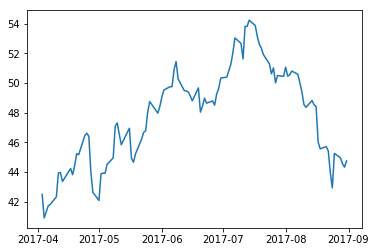

In [19]:
# Plot stock AAL
plt.plot(df5['AAL'])

Text(0, 0.5, 'Price')

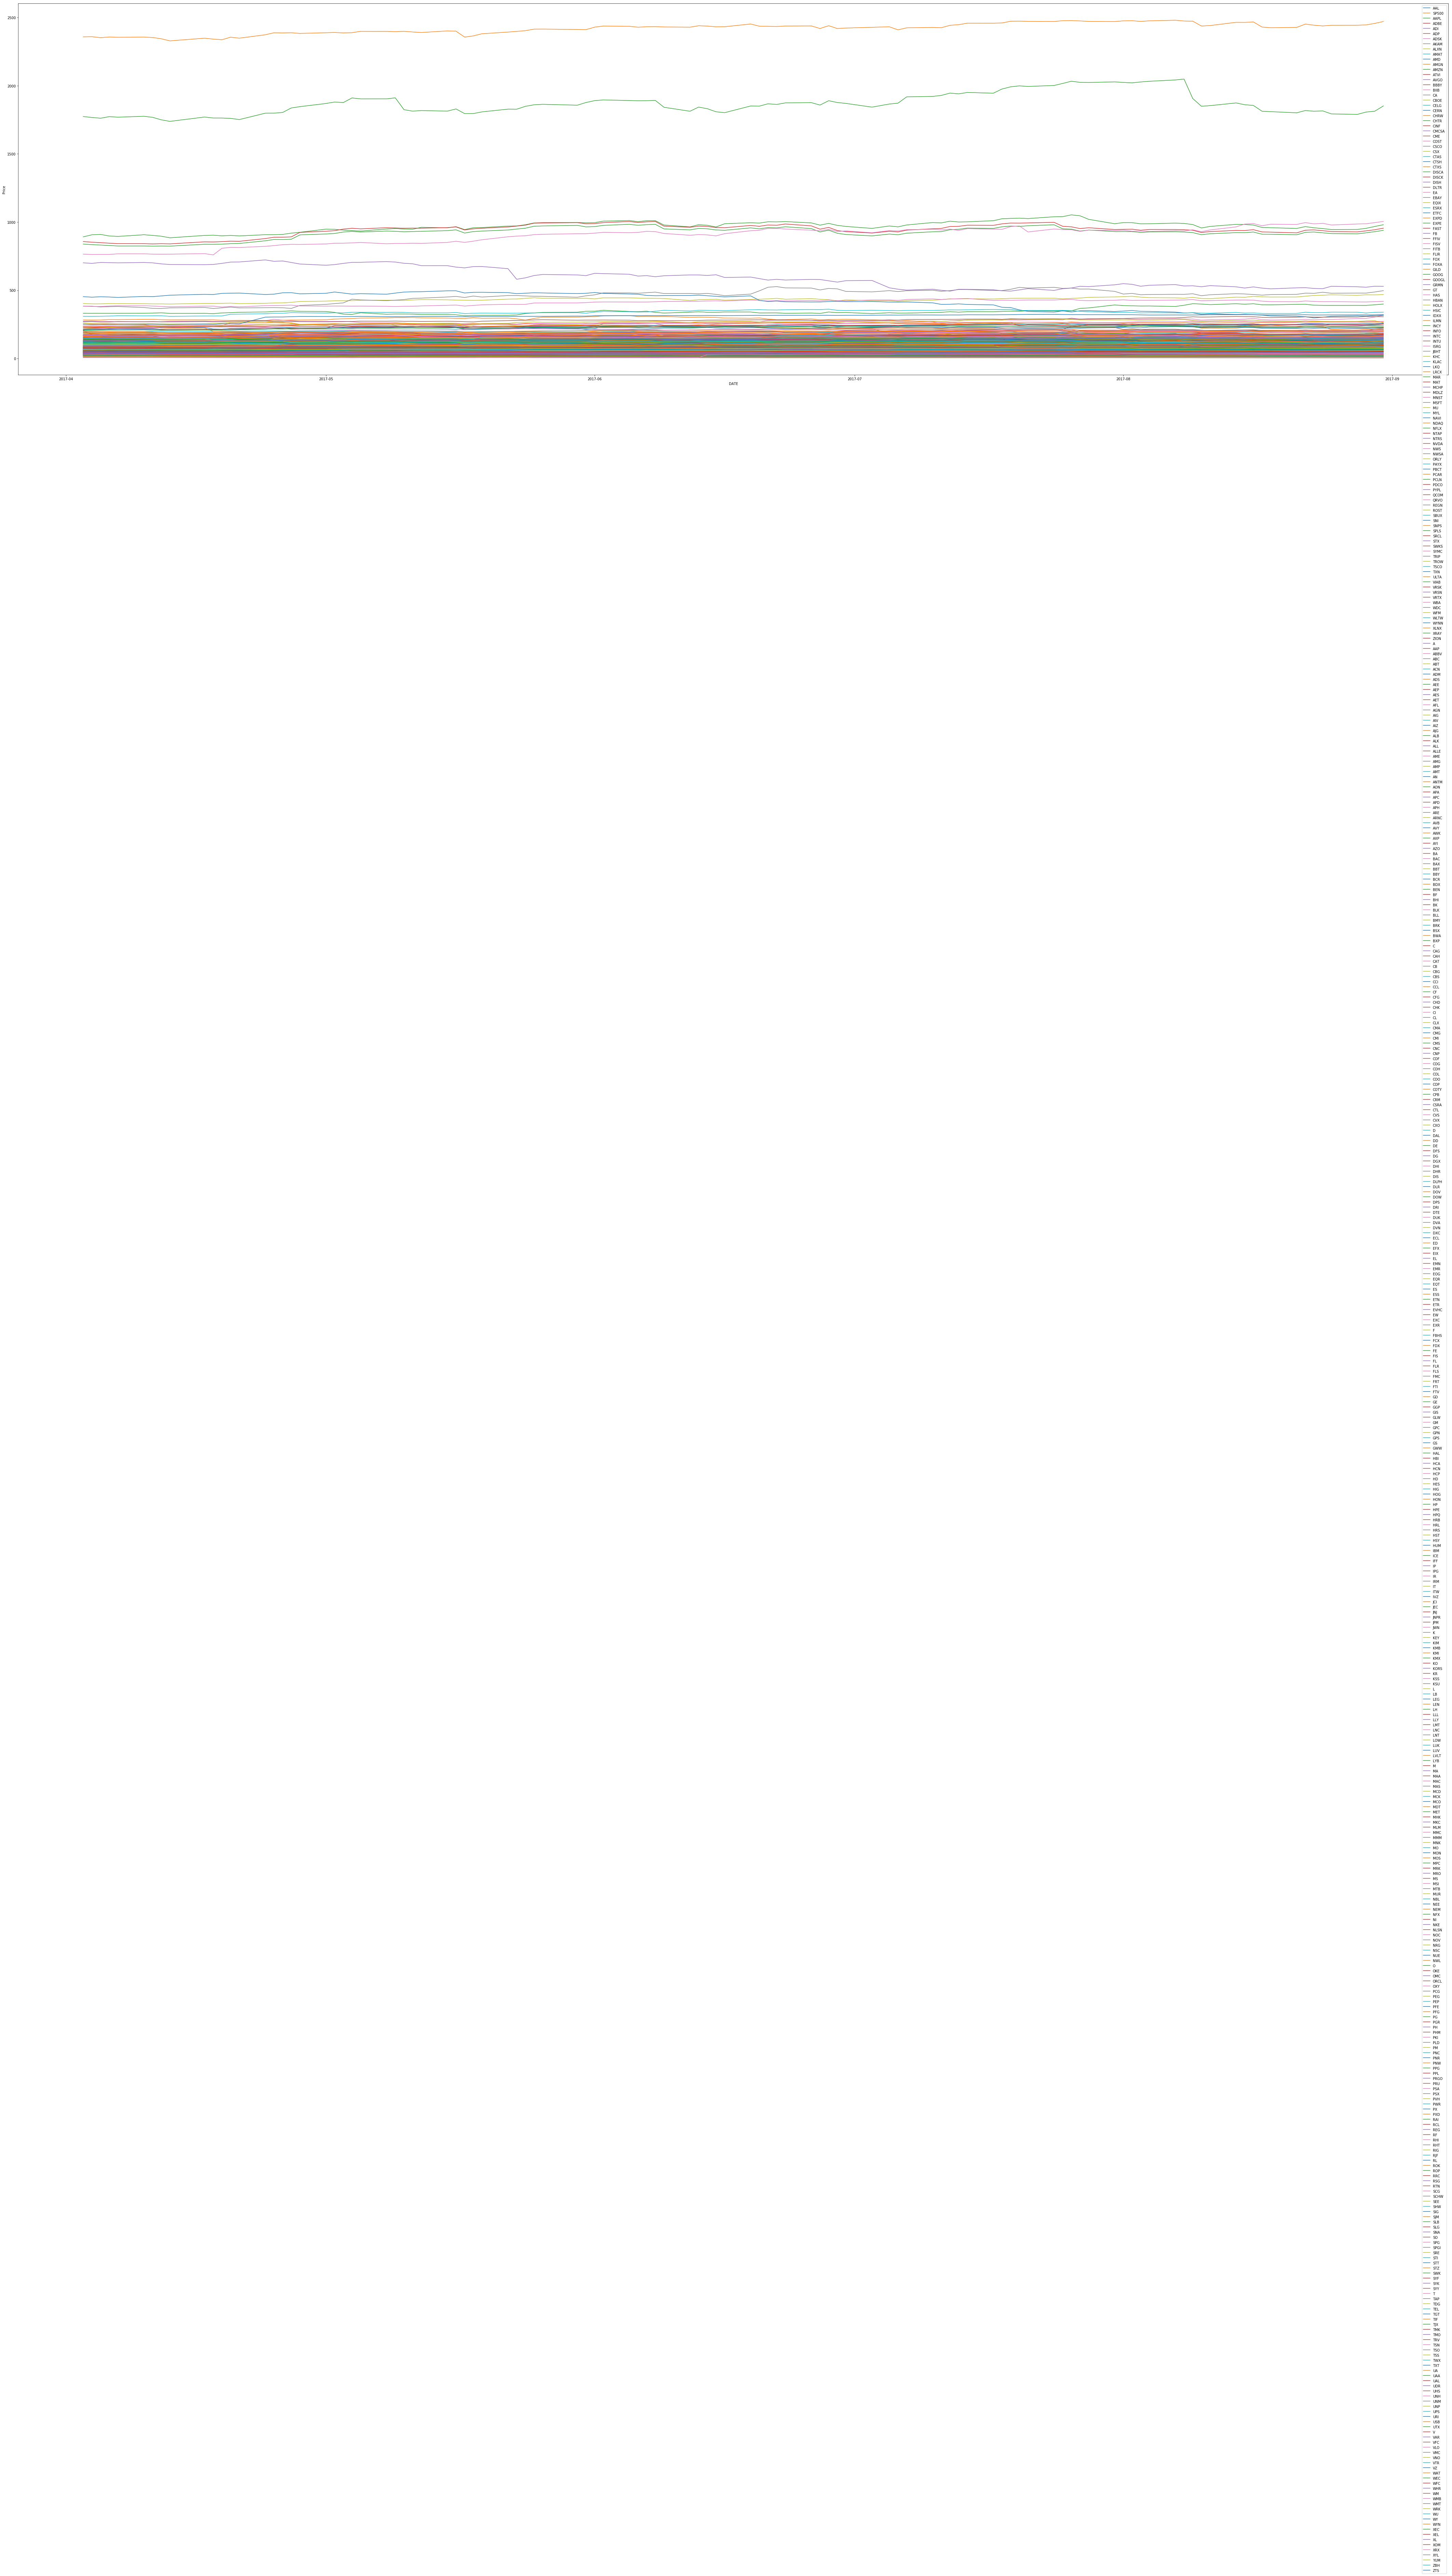

In [21]:
# Plot stocks present in the DataFrame df5
df5.plot(figsize=(75,20))
plt.ylabel('Price')

Text(0, 0.5, 'Return From Start Price')

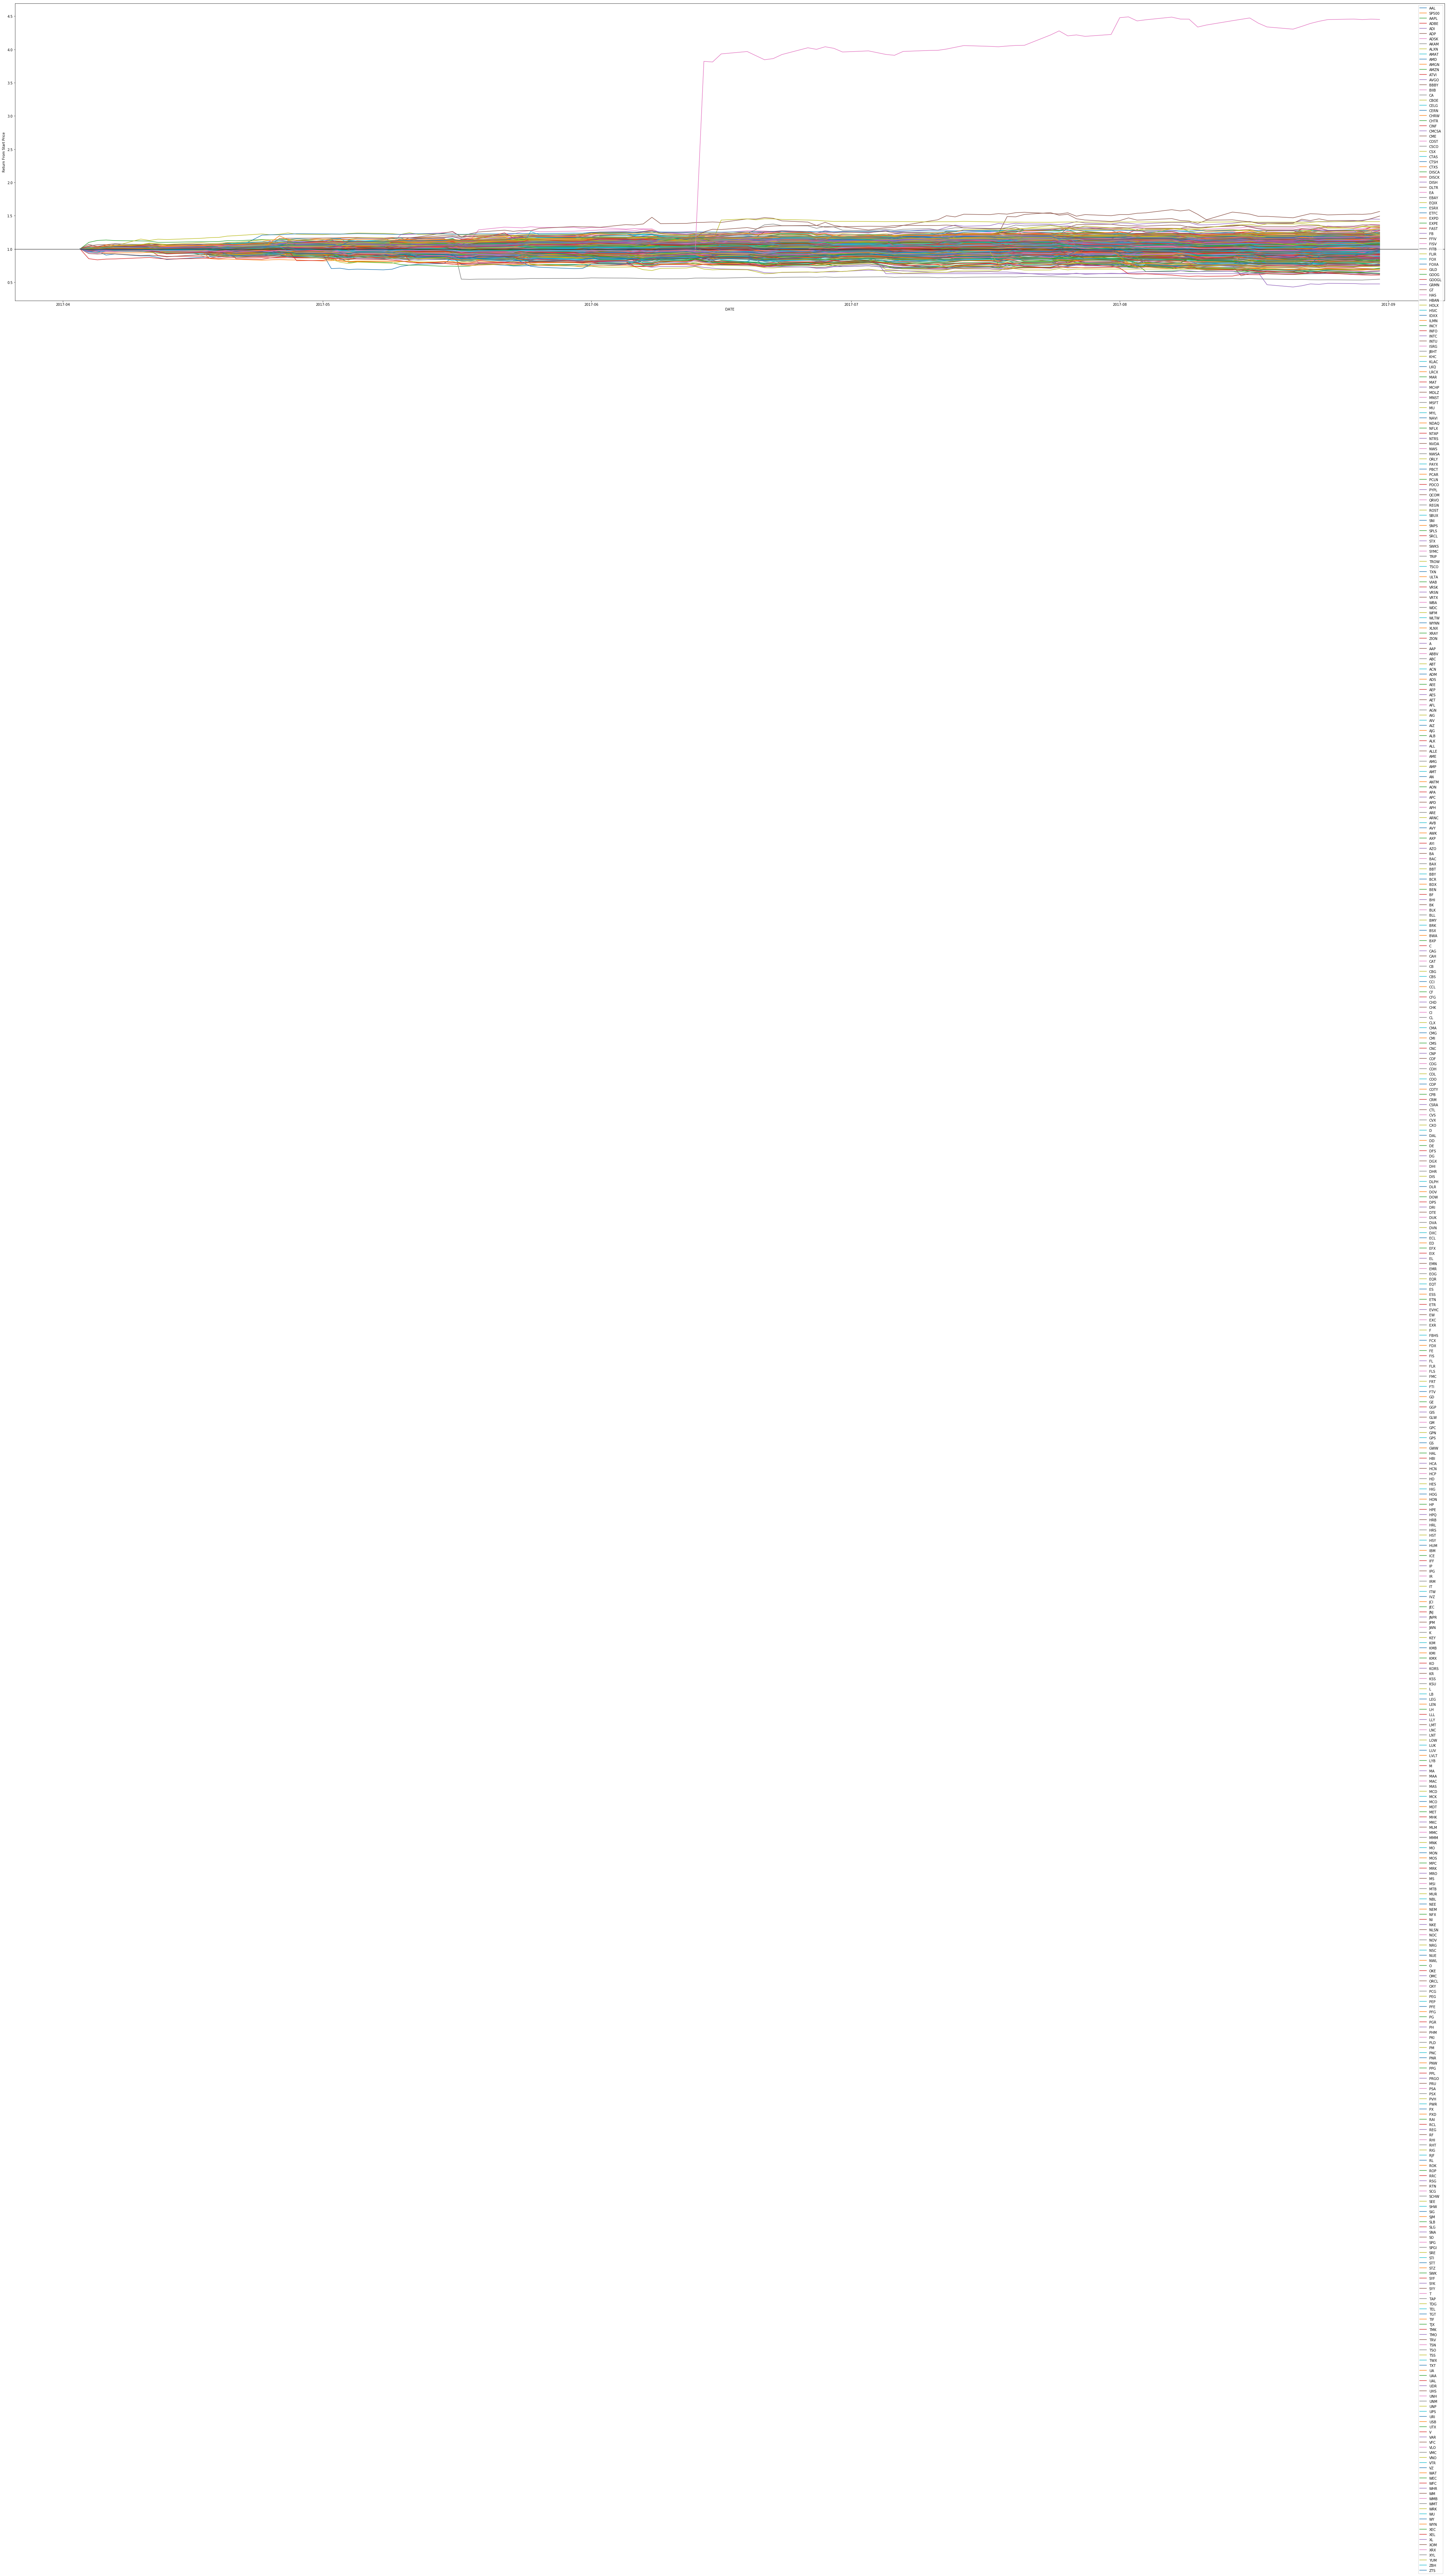

In [24]:
# Check return from start price for all the stocks
returnfstart = df5.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(75,16)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

Text(0, 0.5, 'Daily Percentage Return')

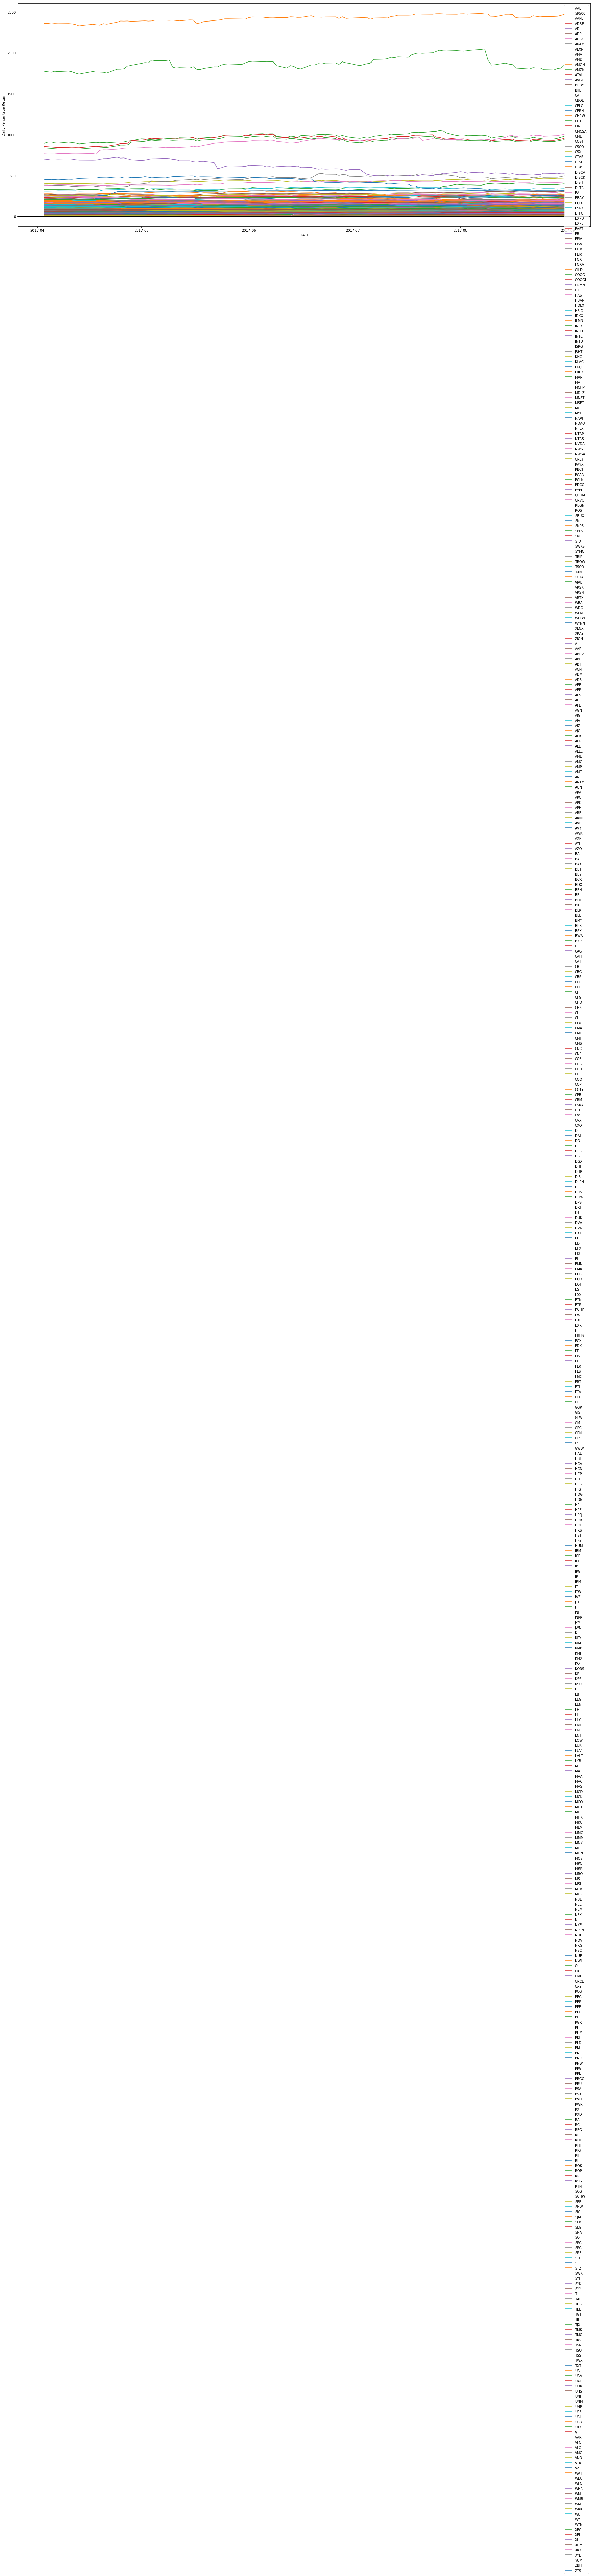

In [25]:
df6=df5.pct_change()
 
df5.plot(figsize=(30,12))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return')

In [26]:
df5.describe()

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,47.719717,2421.181520,150.372602,141.345755,79.393632,103.468726,102.977642,50.874151,122.935896,43.287453,...,97.951406,104.527208,46.692689,43.034094,80.753389,19.350755,54.565895,71.785327,121.467255,60.199583
std,3.272090,40.031479,6.271409,6.950568,1.984853,4.424074,9.402722,4.889023,11.344494,2.475571,...,5.372775,10.630346,1.520344,1.722385,1.856846,11.739667,3.547956,4.083456,5.642329,3.333979
min,40.900000,2329.139900,140.680000,129.050000,75.490000,96.460000,83.540000,44.910000,97.700000,37.520000,...,84.010000,91.300000,44.390000,39.370000,76.086300,6.880000,48.870000,63.550000,110.160000,52.550000
25%,44.942500,2391.602550,144.597500,135.237500,77.995000,101.316250,94.902500,47.402500,117.020000,41.740000,...,95.980000,95.020000,45.145000,41.905000,80.182675,7.050000,51.580000,69.125000,117.750000,59.723750
50%,48.410000,2429.670050,150.065000,142.055000,79.230000,102.440000,106.730000,49.495000,123.670000,43.675000,...,99.345000,99.579500,46.855000,43.275000,81.074500,27.937500,53.960000,73.530000,120.815000,61.565000
75%,50.307500,2447.609975,155.237500,147.302500,80.547500,104.587500,110.640000,52.130000,132.172500,44.992500,...,102.092500,116.675000,47.775000,44.302500,82.080000,30.547500,57.027500,74.770000,125.900000,62.557500
max,54.220000,2480.600100,163.980000,155.160000,86.130000,118.910000,114.970000,62.500000,142.410000,47.450000,...,105.380000,121.910000,49.530000,46.670000,83.460000,32.550000,62.070000,76.810000,132.650000,63.500000


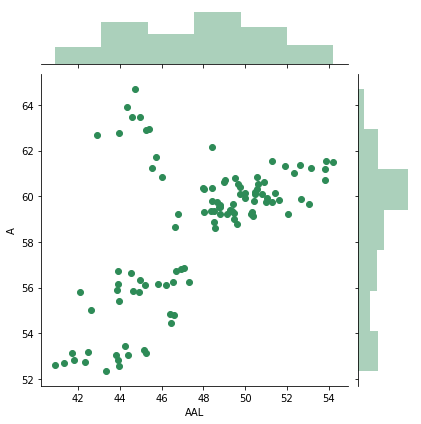

In [27]:
# Check Co-relation between 2 stocks using seaborn library
import seaborn as sns
sns.jointplot('AAL', 'A', df5, kind='scatter', color='seagreen')

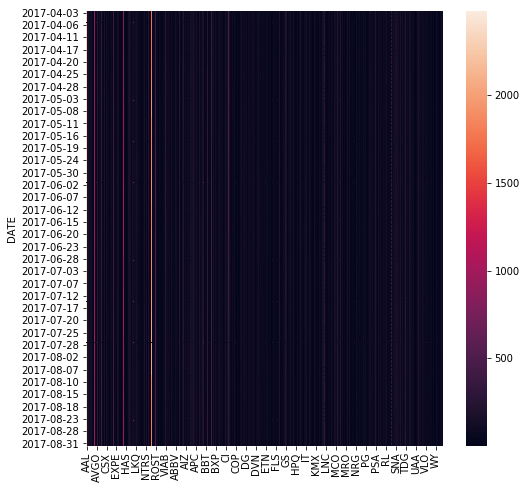

In [28]:
# Use Seaborn to plot Co-relation between all the stocks
plt.figure(figsize=(8,8))
sns.heatmap(df5.dropna())

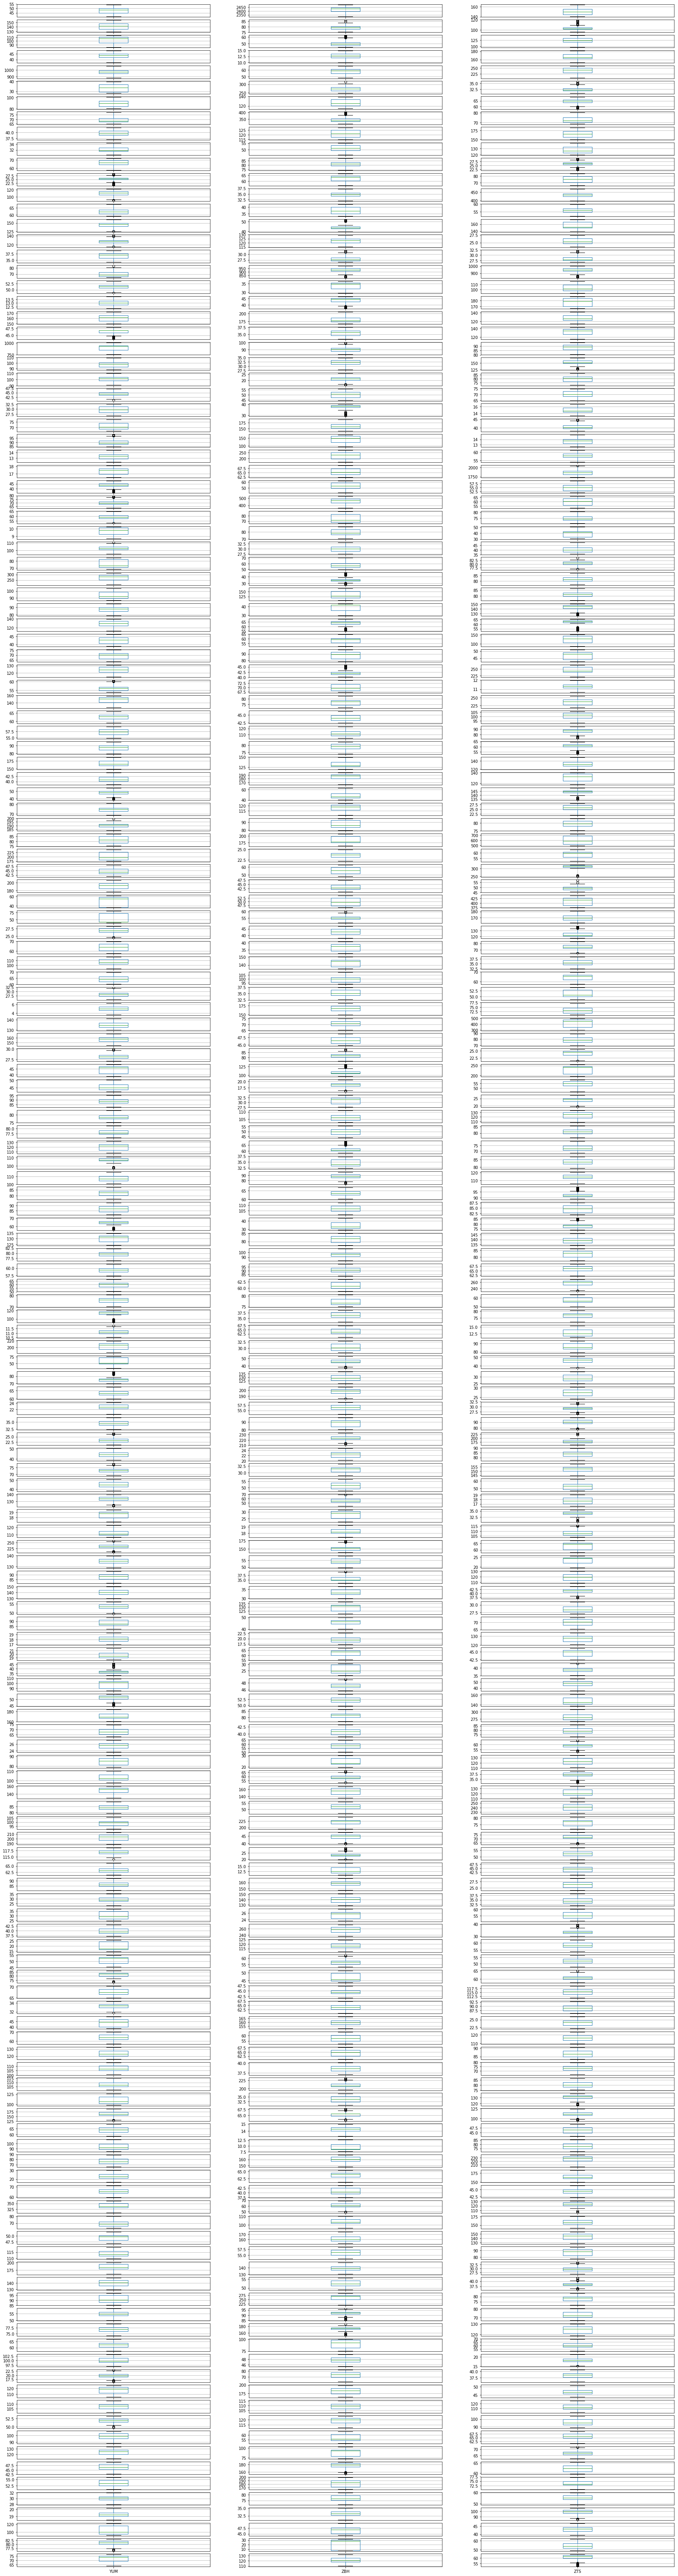

In [29]:
# Outliers visualization using boxplot
fig, axes = plt.subplots(len(df5.columns)//3, 3, figsize=(30, 120))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df5.boxplot(column = df5.columns[i], ax=axis)
        i = i+1 
plt.show()

In [30]:
# Function to perform scaling on thr stock dataset
def standard_scaler(X_train, X_test):
    train_samples, train_nx, train_ny = X_train.shape
    test_samples, test_nx, test_ny = X_test.shape
    
    X_train = X_train.reshape((train_samples, train_nx * train_ny))
    X_test = X_test.reshape((test_samples, test_nx * test_ny))
    
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    X_train = X_train.reshape((train_samples, train_nx, train_ny))
    X_test = X_test.reshape((test_samples, test_nx, test_ny))
    
    return X_train, X_test

In [31]:
# Function to perfrom pre-processing on the stock dataset
def preprocess_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix()
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index : index + sequence_length])
        
    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[: int(row), :]
    
    train, result = standard_scaler(train, result)
    
    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = result[int(row) :, : -1]
    y_test = result[int(row) :, -1][ : ,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]

In [33]:
# Import Libraries for Model building
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep

Using TensorFlow backend.


In [34]:
# Function to build LSTM model -> Apply Dropout -> Create Dense Layer -> Apply Activation function -> 
# Use MSE as loss function -> Calculate compilation time
def build_model(layers):
    model = Sequential()

    # By setting return_sequences to True we are able to stack another LSTM layer
    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [35]:
# Split stock dataset into train-test dataset
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df5[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (76, 20, 501)
y_train (76,)
X_test (9, 20, 501)
y_test (9,)


In [36]:
# Call function to build Model
model = build_model([X_train.shape[2], window, 100, 1])

C:\Users\Swami\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Swami\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 501..., units=20)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Compilation Time :  0.03513073921203613


C:\Users\Swami\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [37]:
# Fit the model
model.fit(
    X_train,
    y_train,
    batch_size=768,
    epochs=300,
    validation_split=0.1,
    verbose=0)

Instructions for updating:
Use tf.cast instead.


In [38]:
# Calculate test/train score
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.05 MSE (0.23 RMSE)
Test Score: 2.85 MSE (1.69 RMSE)


In [39]:
diff = []
ratio = []
pred = model.predict(X_test)
for u in range(len(y_test)):
    pr = pred[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))

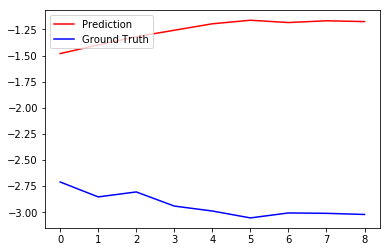

In [41]:
import matplotlib.pyplot as plt2

plt2.plot(pred, color='red', label='Prediction')
plt2.plot(y_test, color='blue', label='Ground Truth')
plt2.legend(loc=2)
plt2.show()